In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time 
from datetime import datetime
import requests
from config import weather_api_key
from scipy.stats import linregress


In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [5]:
# Print the combinations
# for coordinate in coordinates:

#     print(coordinate[0], coordinate[1])

In [6]:
# Create a new list for holding cities
cities = []

# ID the nearest city for each lat/long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [7]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval       ")
print("-------------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all of the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")


    # Log the URL, record, and set numbers and the city

    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count

    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(
            city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | grand gaube
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | innisfail
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | manokwari
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | aswan
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | los llanos de aridane
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | juazeirinho
Processing Record 23 of Se

In [8]:
# Convert the array of dictionaries to a pandas DF

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand Gaube,-20.0064,57.6608,66.60,76,33,3.00,MU,2022-06-28 22:28:43
1,Vaini,-21.2000,-175.2000,77.16,88,75,5.75,TO,2022-06-28 22:28:43
2,Yellowknife,62.4560,-114.3525,72.12,35,75,17.27,CA,2022-06-28 22:28:44
3,Castro,-24.7911,-50.0119,56.28,88,0,4.16,BR,2022-06-28 22:28:44
4,Mahebourg,-20.4081,57.7000,66.49,88,75,14.97,MU,2022-06-28 22:28:44
5,Bluff,-46.6000,168.3333,47.80,83,94,17.67,NZ,2022-06-28 22:28:45
6,Bethel,41.3712,-73.4140,79.07,49,0,8.05,US,2022-06-28 22:28:45
7,Ancud,-41.8697,-73.8203,53.22,97,100,12.21,CL,2022-06-28 22:28:46
8,Innisfail,-17.5333,146.0333,67.64,91,100,6.60,AU,2022-06-28 22:28:46
9,Arraial Do Cabo,-22.9661,-42.0278,69.66,73,0,11.50,BR,2022-06-28 22:28:46


In [9]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand Gaube,MU,2022-06-28 22:28:43,-20.0064,57.6608,66.60,76,33,3.00
1,Vaini,TO,2022-06-28 22:28:43,-21.2000,-175.2000,77.16,88,75,5.75
2,Yellowknife,CA,2022-06-28 22:28:44,62.4560,-114.3525,72.12,35,75,17.27
3,Castro,BR,2022-06-28 22:28:44,-24.7911,-50.0119,56.28,88,0,4.16
4,Mahebourg,MU,2022-06-28 22:28:44,-20.4081,57.7000,66.49,88,75,14.97


In [10]:
# Create the output file (CSV)
output_data_file = "Weather_Data/cities.csv"

# Export the City_Data into csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DF for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df["Wind Speed"]


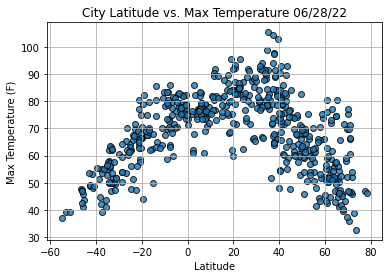

In [12]:
# Import time module
import time

# Build the scatter plot for lat vs max temp

plt.scatter(lats
    , max_temps
    , edgecolor="black"
    , linewidths = 1
    , marker = 'o'
    , alpha = 0.8
    , label = "Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig 
plt.savefig("Weather_Data/Fig1.png")

# Show plot after save
plt.show()

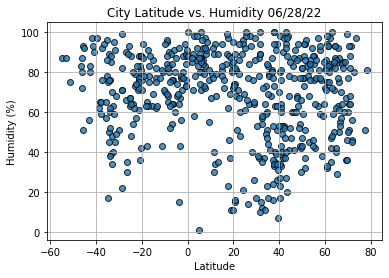

In [13]:
plt.scatter(lats
    , humidity
    , edgecolor="black"
    , linewidths=1
    , marker='o'
    , alpha=0.8
    , label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Weather_Data/Fig2.png")

# Show plot after save
plt.show()


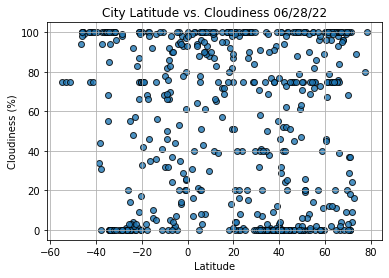

In [14]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1,
            marker='o', alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Weather_Data/Fig3.png")

# Show plot after save
plt.show()


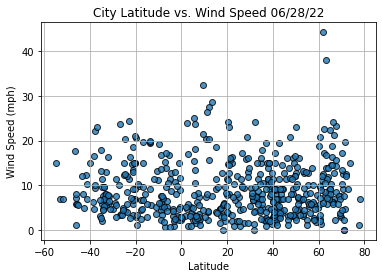

In [15]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1,
            marker='o', alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Weather_Data/Fig4.png")

# Show plot after save
plt.show()


In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemusphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

 # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


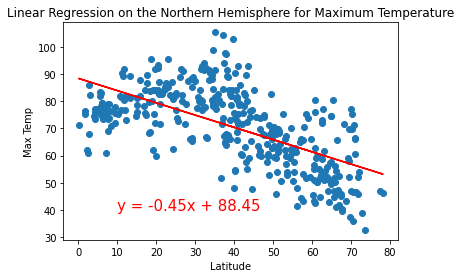

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

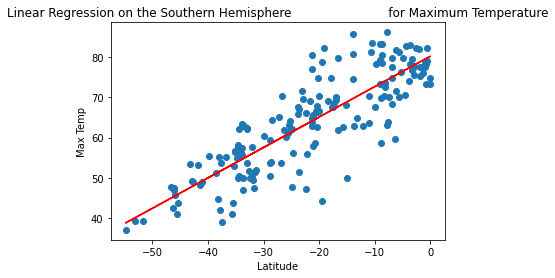

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

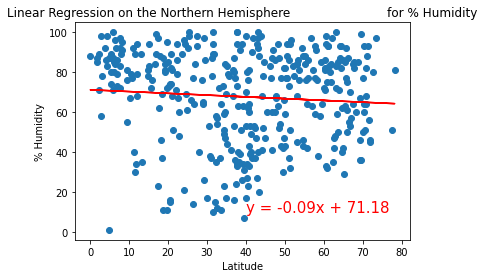

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

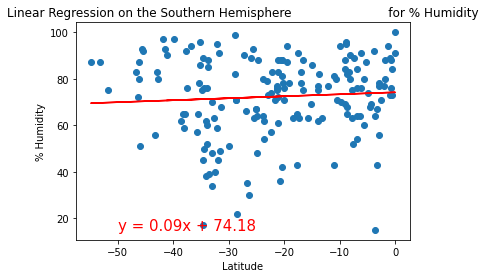

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

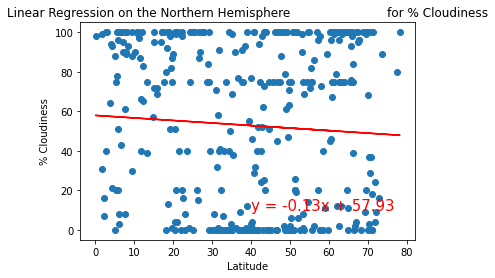

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

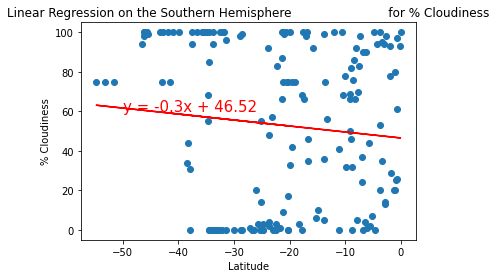

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

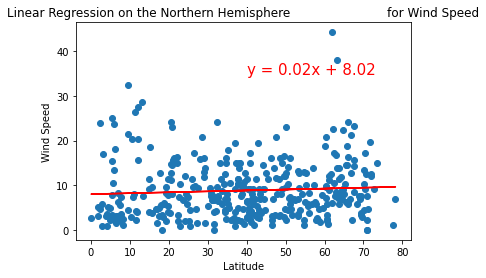

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

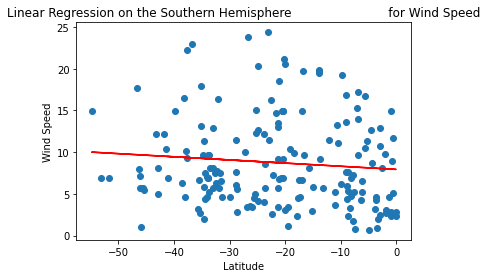

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))